# Tugas Kecil AI 1
<hr>
<hr>

##### Anggota
Vincent Hendryanto Halim - 13515089
Mikhael Artur Darmakesuma - 13515099

##### Catatan Penting
Dokumentasi Kelas : http://scikit-learn.org/stable/modules/classes.html

#### Inisialisasi Library

In [1]:
## Library Import and Initializations
# Datasets Library
import pandas as pd
import graphviz
from sklearn.datasets import load_iris

# Algorithm Library
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

### Skema Full-Training

In [2]:
# Read iris & play_tennis dataset
iris_data = load_iris()
tennis_data = pd.read_csv('dataset/tennis.csv')

### Naive Bayes

In [3]:
gnb = GaussianNB()
gnb.fit(iris_data.data, iris_data.target).predict(iris_data.data)

# Mencetak peluang tiap kelas
gnb.class_prior_

array([ 0.33333333,  0.33333333,  0.33333333])

### Decision Tree

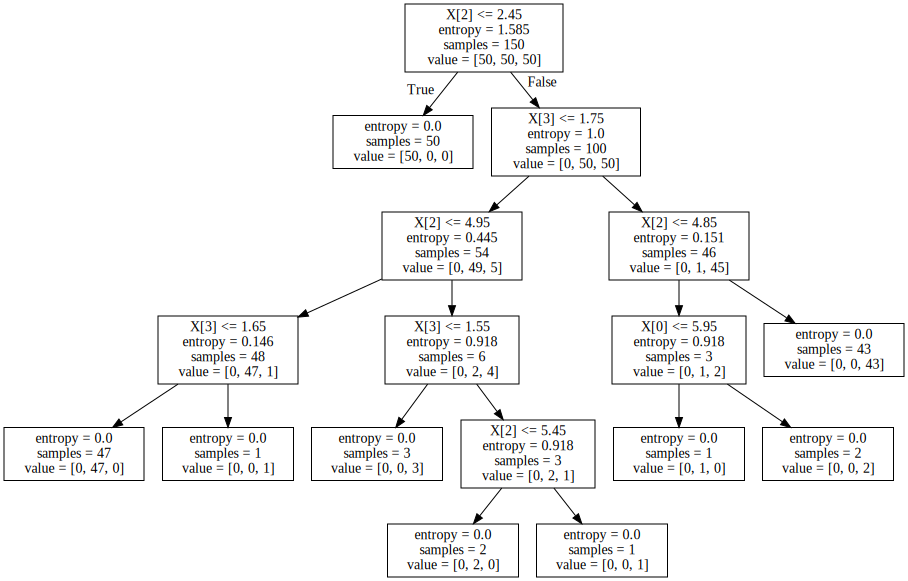

In [4]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(iris_data.data, iris_data.target)

tree_data = tree.export_graphviz(dt, out_file=None) 
graph = graphviz.Source(tree_data) 
graph

### KNN
KNN Tidak memiliki model

In [5]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(iris_data["data"], iris_data["target"])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### MLP

In [6]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(iris_data["data"], iris_data["target"])

# Mencetak Weight pada tiap node
mlp.coefs_

[array([[-0.13550239,  0.3597881 , -0.81630916, -0.3227893 , -0.57684476],
        [-0.66570776, -0.51233452, -0.25219808, -0.16857787,  0.06338741],
        [-0.1319547 ,  0.30246194, -0.48262707,  0.6174627 , -0.77177221],
        [ 0.27837206, -0.13504058,  0.09584001, -0.5872452 , -0.49299781]]),
 array([[ 0.73066898, -0.76834821],
        [-0.85350401, -0.61135478],
        [ 0.7001833 , -0.74371656],
        [-0.14608018,  0.84784599],
        [ 0.06141013,  0.35528709]]),
 array([[ 0.73312753, -1.05537667,  0.5480383 ],
        [ 1.07104013,  0.54370328, -0.48102273]])]

## Skema Split Train 90-10
<hr>

#### Split Data

In [7]:
x_train, x_test, y_train, y_test = train_test_split(iris_data["data"], iris_data["target"], test_size=0.1)

### Decision Tree

In [8]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
dt_result = dt.predict(x_test)
dt_conf_matr = confusion_matrix(dt_result, y_test)
dt_conf_matr

array([[6, 0, 0],
       [0, 6, 1],
       [0, 0, 2]])

In [10]:
dt_score = dt.score(x_test, y_test)
dt_score

0.93333333333333335

### Naive Bayes

In [11]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB(priors=None)

In [12]:
gnb_result = dt.predict(x_test)
gnb_conf_matr = confusion_matrix(gnb_result, y_test)
gnb_conf_matr

array([[6, 0, 0],
       [0, 6, 1],
       [0, 0, 2]])

In [13]:
gnb_score = gnb.score(x_test, y_test)
gnb_score

0.93333333333333335

### KNN

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
knn_result = knn.predict(x_test)
knn_conf_matr = confusion_matrix(knn_result, y_test)
knn_conf_matr

array([[6, 0, 0],
       [0, 6, 1],
       [0, 0, 2]])

In [16]:
knn_score = knn.score(x_test, y_test)
knn_score

0.93333333333333335

### MLP

In [17]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [18]:
mlp_result = mlp.predict(x_test)
mlp_conf_matr = confusion_matrix(knn_result, y_test)
mlp_conf_matr

array([[6, 0, 0],
       [0, 6, 1],
       [0, 0, 2]])

In [19]:
mlp_score = mlp.score(x_test, y_test)
mlp_score

0.20000000000000001

## Skema 10 Fold Cross Validation
<hr>

### Naive Bayes

In [20]:
gnb = GaussianNB()
cross_val_score(gnb, iris_data["data"], iris_data["target"], cv=10)

array([ 0.93333333,  0.93333333,  1.        ,  0.93333333,  0.93333333,
        0.93333333,  0.86666667,  1.        ,  1.        ,  1.        ])

### KNN

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
cross_val_score(knn, iris_data["data"], iris_data["target"], cv=10)

array([ 1.        ,  0.93333333,  1.        ,  1.        ,  0.86666667,
        0.93333333,  0.93333333,  1.        ,  1.        ,  1.        ])

### Decision Tree

In [22]:
dt = tree.DecisionTreeClassifier()
cross_val_score(dt, iris_data["data"], iris_data["target"], cv=10)

array([ 1.        ,  0.93333333,  1.        ,  0.93333333,  0.93333333,
        0.86666667,  0.93333333,  0.93333333,  1.        ,  1.        ])

### MLP

In [23]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
cross_val_score(mlp, iris_data["data"], iris_data["target"], cv=10)

array([ 0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333,
        0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333])

## External File

In [24]:
import pickle

### Save To File

In [25]:
pickle.dump(gnb,open("out.pkl", "wb+"))
pickle.dump(knn,open("out.pkl", "ab+"))
pickle.dump(dt,open("out.pkl", "ab+"))
pickle.dump(mlp,open("out.pkl", "ab+"))

### Open File

In [26]:
pickle.load(open("out.pkl","rb+"))

GaussianNB(priors=None)

## New Instance & Predict
<hr>

### Membuat Instance Baru

Karena scikit menyimpan data dalam bentuk list, dibuat data dalam bentuk list

In [27]:
iris_new = [[5.3, 3.1, 1.7, 0.9]]

### Prediksi

#### Inisialisasi Prediksi (Skema Full Training)

In [28]:
gnb = GaussianNB()
gnb.fit(iris_data.data, iris_data.target).predict(iris_data.data)

dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(iris_data.data, iris_data.target)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(iris_data["data"], iris_data["target"])

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(iris_data["data"], iris_data["target"]);

#### Naive Bayes

In [29]:
gnb_prediction = gnb.predict(iris_new)
iris_data.target_names[gnb_prediction]

array(['versicolor'],
      dtype='<U10')

#### Decision Tree

In [30]:
dt_prediction = dt.predict(iris_new)
iris_data.target_names[dt_prediction]

array(['setosa'],
      dtype='<U10')

#### KNN

In [31]:
knn_prediction = knn.predict(iris_new)
iris_data.target_names[knn_prediction]

array(['setosa'],
      dtype='<U10')

##### MLP

In [32]:
mlp_prediction = mlp.predict(iris_new)
iris_data.target_names[mlp_prediction]

array(['virginica'],
      dtype='<U10')